# Wine Dataset k-NN Analysis
**Author:** Salih YAVUZ

This notebook demonstrates how to implement the k-Nearest Neighbors (k-NN)
algorithm from scratch on the Wine dataset. 
1. Load and explore the dataset.
2. Preprocess the data (scaling, splitting).
3. Implement k-NN (distance functions, prediction, accuracy).
4. Test different k values and distance metrics.
5. Evaluate performance (confusion matrix, classification report).
6. Visualize results.


In [5]:
# --------------------------
# 1) LIBRARY IMPORTS & COLUMN NAMES
# --------------------------

import pandas as pd           # for data manipulation
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt  # for plotting
from sklearn.model_selection import train_test_split  # to split dataset
from sklearn.preprocessing import StandardScaler      # to scale features
from sklearn.metrics import confusion_matrix, classification_report  # evaluation metrics
from collections import Counter  # to count most frequent elements

# Define column names (assuming Class is in the first column)
col_names = [
    "Class",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280_OD315_of_diluted_wines",
    "Proline"
]
# Read the Wine dataset from a CSV file named "wine.data"
df = pd.read_csv(r"C:\Users\Salih\Desktop\dersler\ml\hw1\wine.data", names=col_names)

# Print the first 5 rows to verify correct loading
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065

**Explanation:**
- We imported the necessary libraries for data manipulation (`pandas`, `numpy`),
  plotting (`matplotlib`), splitting (`train_test_split`), scaling (`StandardScaler`),
  and evaluation (`confusion_matrix`, `classification_report`).
- We defined the column names for the Wine dataset (class plus 13 features).
- Lastly, we used `pd.read_csv` to load the data and displayed the first 5 rows to verify loading.


In [6]:

# --------------------------
# 2) PREPROCESSING & SPLITTING
# --------------------------
# Separate features (X) and class labels (y)
X = df.drop("Class", axis=1).values  # all columns except 'Class'
y = df["Class"].values  # the Class column

# Create a StandardScaler to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # fit to X, then transform it

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # scaled features
    y,  # class labels
    test_size=0.2,  # 20% as test data
    random_state=42
)
print("\nFirst 5 rows of the scaled X_scaled:")
print(X_scaled[:5])



First 5 rows of the scaled X_scaled:
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


**Explanation:**
- We separate the dataset into features (X) and labels (y).
- `StandardScaler()` is used to standardize features (mean=0, std=1),
  which can improve k-NN performance since it depends on distances.
- Finally, we split the scaled features and labels into training
  (80%) and testing (20%) subsets.


In [7]:
# --------------------------
# 3) K-NN IMPLEMENTATION
# --------------------------
def euclidean_distance(a, b):
    # Calculate Euclidean (L2) distance between vectors a and b
    return np.sqrt(np.sum((a - b) ** 2))


def manhattan_distance(a, b):
    # Calculate Manhattan (L1) distance between vectors a and b
    return np.sum(np.abs(a - b))


def knn_predict(X_train, y_train, x_test, k, dist_func):
    # Predict the class for a single test sample x_test using k-NN
    distances = []
    for i, x_train_sample in enumerate(X_train):
        dist = dist_func(x_train_sample, x_test)  # compute distance
        distances.append((dist, y_train[i]))  # store (distance, label)
    distances.sort(key=lambda x: x[0])  # sort by distance, ascending
    k_nearest = distances[:k]  # take the k closest
    labels = [label for _, label in k_nearest]  # extract their labels
    # return the most frequent label among the k nearest neighbors
    return Counter(labels).most_common(1)[0][0]


def knn_accuracy(X_train, y_train, X_test, y_test, k, dist_func):
    # Calculate accuracy of k-NN on the entire test set
    correct = 0
    for i, x_test_sample in enumerate(X_test):
        prediction = knn_predict(X_train, y_train, x_test_sample, k, dist_func)
        if prediction == y_test[i]:
            correct += 1
    return correct / len(X_test)



**Explanation:**
- We define two distance functions: Euclidean and Manhattan.
- `knn_predict` calculates the distance from one test sample to every sample
  in the training set, sorts them, takes the top `k`, and returns the most common label.
- `knn_accuracy` loops through all test samples, uses `knn_predict` for each,
  and tallies how many are correctly classified.


In [8]:
# --------------------------
# 4) EXPERIMENT: DIFFERENT K & METRICS
# --------------------------
# Choose some k values
k_values = [1, 3, 5, 7, 9]

# Dictionary of distance functions to try
dist_funcs = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance
}

# Dictionary to store accuracy results for plotting
results = {}

# Loop over each distance metric
for dist_name, dist_func in dist_funcs.items():
    print(f"\nUsing {dist_name} distance:")
    acc_list = []
    # For each k in k_values, calculate accuracy
    for k_val in k_values:
        acc = knn_accuracy(X_train, y_train, X_test, y_test, k_val, dist_func)
        acc_list.append(acc)
        print(f"  k={k_val}, Accuracy={acc:.3f}")
    results[dist_name] = acc_list


Using Euclidean distance:
  k=1, Accuracy=0.944
  k=3, Accuracy=0.944
  k=5, Accuracy=0.944
  k=7, Accuracy=0.944
  k=9, Accuracy=0.944

Using Manhattan distance:
  k=1, Accuracy=0.944
  k=3, Accuracy=0.944
  k=5, Accuracy=0.944
  k=7, Accuracy=0.944
  k=9, Accuracy=0.972


**Explanation:**
We loop over a list of `k` values (1, 3, 5, 7, 9) and two distance metrics
(Euclidean, Manhattan). For each combination, we compute test-set accuracy
and print the results. This shows which combination of `k` and metric works best.



Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



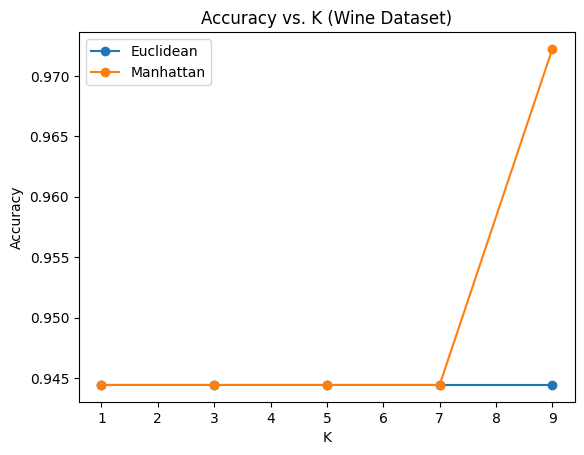

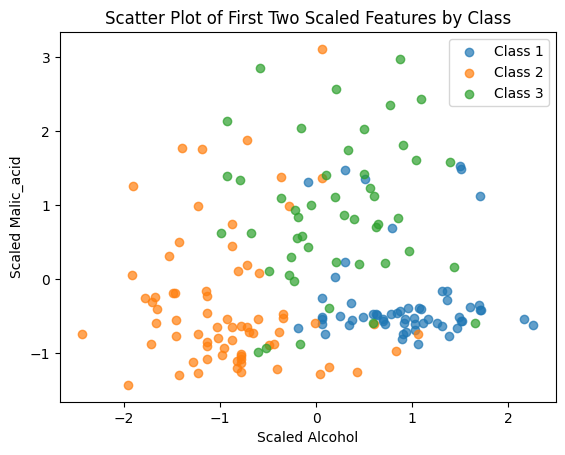

In [9]:
# --------------------------
# 5) CONFUSION MATRIX & REPORT
# --------------------------
# Suppose we pick the best combo from the results (e.g., k=5, Manhattan)
final_k = 5
final_dist_func = manhattan_distance  # example choice

# Predict labels on the test set
y_pred = [knn_predict(X_train, y_train, x_test_sample, final_k, final_dist_func)
          for x_test_sample in X_test]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# --------------------------
# 6) PLOT ACCURACY VS. K
# --------------------------
for dist_name, acc_list in results.items():
    plt.plot(k_values, acc_list, marker='o', label=dist_name)

plt.title("Accuracy vs. K (Wine Dataset)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Here, we visualize the first two features of X_scaled to see class separation.

plt.figure()
unique_classes = np.unique(y)
for c in unique_classes:
    # plot only rows where the label == c
    plt.scatter(
        X_scaled[y == c, 0],  # first feature (scaled Alcohol)
        X_scaled[y == c, 1],  # second feature (scaled Malic_acid)
        label=f"Class {c}",
        alpha=0.7
    )
plt.title("Scatter Plot of First Two Scaled Features by Class")
plt.xlabel("Scaled Alcohol")
plt.ylabel("Scaled Malic_acid")
plt.legend()
plt.show()


**Explanation:**
- First, we plot accuracy vs. `k` for each distance metric, so we can see which 
  combination yields the best performance.
- Next, we create a scatter plot of the first two scaled features. Each class is
  shown with a different color, letting us visually inspect how well separated
  they might be in just two dimensions.
